## 25/02/19

- Plotting curves of the progression of fractionation labels to see if a difference between AF and non-AF patients exists.

In [1]:
# Import necessary modules. Set settings. Import data.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.display import HTML

from sklearn.decomposition import PCA

from IPython.display import display, clear_output
import pdb

plt.style.use('default')

X = pd.read_pickle('/Users/matthewashman/github/MasterProject2018/Data/X_all_labels.pkl')

In [2]:
# Remove bad files with bad labels
X = X[~(X['CS1-2 Label']=='-1') & ~(X['CS3-4 Label']=='-1') & ~(X['CS5-6 Label']=='-1')]

In [3]:
label_list = []

cis = X['Coupling Interval'].unique()
patient_types = X['Type'].unique()

plot=False
# Loop through each patient type
for patient_type in patient_types:
    # Get patients in patient type
    patients = X[(X['Type']==patient_type) & (X['S1/S2']=='S2')]['Patient'].unique()
    for patient in patients:
        # Get specific patient data
        patient_X = X[(X['S1/S2']=='S2') & (X['Type']==patient_type) & (X['Patient']==patient)]
        
        # Initialise dictionaries
        cs12_dict = {}
        cs12_dict['Type'] = patient_type
        cs12_dict['Patient'] = patient
        cs12_dict['Channel'] = 'CS1-2'
        cs34_dict = {}
        cs34_dict['Type'] = patient_type
        cs34_dict['Patient'] = patient
        cs34_dict['Channel'] = 'CS3-4'
        cs56_dict = {}
        cs56_dict['Type'] = patient_type
        cs56_dict['Patient'] = patient
        cs56_dict['Channel'] = 'CS5-6'
        
        patient_cis = patient_X['Coupling Interval'].unique()
        
        # Loop through coupling intervals the patient has a response for. Store labels in dictionaries.
        for ci in patient_cis:
            cs12_dict[ci] = int(patient_X[patient_X['Coupling Interval']==ci]['CS1-2 Label 2'])
            cs34_dict[ci] = int(patient_X[patient_X['Coupling Interval']==ci]['CS3-4 Label 2'])
            cs56_dict[ci] = int(patient_X[patient_X['Coupling Interval']==ci]['CS5-6 Label 2'])
                
        if plot==True:
            %matplotlib qt
            fig, axes = plt.subplots(nrows=len(patient_cis), ncols=3, sharex=True, figsize=(16,9))
            if (len(patient_cis)>1):
                for i, ci in enumerate(patient_cis):
                    axes[i][0].plot(range(1,151), patient_X[patient_X['Coupling Interval']==ci]['CS1-2'].values[0])
                    axes[i][0].annotate(str(cs12_dict[ci]), (150, 0))

                    axes[i][1].plot(range(1,151), patient_X[patient_X['Coupling Interval']==ci]['CS3-4'].values[0])
                    axes[i][1].annotate(str(cs34_dict[ci]), (150, 0))

                    axes[i][2].plot(range(1,151), patient_X[patient_X['Coupling Interval']==ci]['CS5-6'].values[0])
                    axes[i][2].annotate(str(cs56_dict[ci]), (150, 0))
            else:
                axes[0].plot(range(1,151), patient_X[patient_X['Coupling Interval']==ci]['CS1-2'].values[0])
                axes[0].annotate(str(cs12_dict[ci]), (150, 0))

                axes[1].plot(range(1,151), patient_X[patient_X['Coupling Interval']==ci]['CS3-4'].values[0])
                axes[1].annotate(str(cs34_dict[ci]), (150, 0))

                axes[2].plot(range(1,151), patient_X[patient_X['Coupling Interval']==ci]['CS5-6'].values[0])
                axes[2].annotate(str(cs56_dict[ci]), (150, 0))
            
            plt.suptitle('Fractionation Labels For ' + patient_type + ' ' + patient)
            plt.draw()
            plt.waitforbuttonpress()
            plt.close()



        # Append dictionaries to the lists
        label_list.append(cs12_dict)
        label_list.append(cs34_dict)
        label_list.append(cs56_dict)
    
# Convert the list to a DataFrame
label_df = pd.DataFrame(label_list)

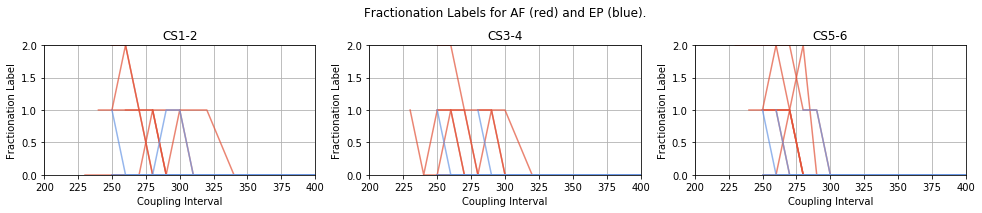

In [4]:
# Comparing fractionation label curves between patient types
colours = ['#e25238', '#6997e5']
patient_types = ['af', 'ep']
labels = [1,0]

fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(16, 3))
for patient_type, colour in zip(patient_types, colours):
    patients = label_df[label_df['Type']==patient_type]['Patient'].unique()
    for patient in patients:
        x = np.arange(230, 410, 10)
        cs12_labels = np.squeeze(label_df.loc[(label_df['Type']==patient_type) & (label_df['Patient']==patient)
                                             & (label_df['Channel']=='CS1-2')
                                             ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
        x_cs12 = x[~np.isnan(cs12_labels)]
        cs12_labels = cs12_labels[~np.isnan(cs12_labels)]
        
        cs34_labels = np.squeeze(label_df.loc[(label_df['Type']==patient_type) & (label_df['Patient']==patient)
                                             & (label_df['Channel']=='CS3-4')
                                             ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
        x_cs34 = x[~np.isnan(cs34_labels)]
        cs34_labels = cs34_labels[~np.isnan(cs34_labels)]
        
        cs56_labels = np.squeeze(label_df.loc[(label_df['Type']==patient_type) & (label_df['Patient']==patient)
                                             & (label_df['Channel']=='CS5-6')
                                             ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
        x_cs56 = x[~np.isnan(cs56_labels)]
        cs56_labels = cs56_labels[~np.isnan(cs56_labels)]
                
        # Plot conduction delay curves for patient
        
        ax1.plot(x_cs12, cs12_labels, '-', color=colour, alpha=0.7)
        
        ax2.plot(x_cs34, cs34_labels, '-', color=colour, alpha=0.7)

        ax3.plot(x_cs56, cs56_labels, '-', color=colour, alpha=0.7)
        
ax1.set_title('CS1-2')
ax1.set_xlabel('Coupling Interval')
ax1.set_ylabel('Fractionation Label')
ax1.set_ylim(0,2)
ax1.set_xlim(200, 400)
# ax1.legend(['AF', 'AT'])
ax1.grid()
        
ax2.set_title('CS3-4')
ax2.set_xlabel('Coupling Interval')
ax2.set_ylabel('Fractionation Label')
ax2.set_ylim(0,2)
ax2.set_xlim(200,400)
# ax2.legend(['AF', 'AT'])
ax2.grid()
        
ax3.set_title('CS5-6')
ax3.set_xlabel('Coupling Interval')
ax3.set_ylabel('Fractionation Label')
ax3.set_ylim(0,2)
ax3.set_xlim(200,400)
# ax3.legend(['AF', 'AT'])
ax3.grid()
        
plt.suptitle('Fractionation Labels for AF (red) and EP (blue).')
plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.2)

plt.show()

In [5]:
# %matplotlib qt

# # patient fractionation label curves
# for patient_type in patient_types:
#     patients = label_df[label_df['Type']==patient_type]['Patient'].unique()
#     for patient in patients:
#         x = np.arange(230, 410, 10)
#         cs12_labels = np.squeeze(label_df.loc[(label_df['Type']==patient_type) & (label_df['Patient']==patient)
#                                              & (label_df['Channel']=='CS1-2')
#                                              ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
#         x_cs12 = x[~np.isnan(cs12_labels)]
#         cs12_labels = cs12_labels[~np.isnan(cs12_labels)]
        
#         cs34_labels = np.squeeze(label_df.loc[(label_df['Type']==patient_type) & (label_df['Patient']==patient)
#                                              & (label_df['Channel']=='CS3-4')
#                                              ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
#         x_cs34 = x[~np.isnan(cs34_labels)]
#         cs34_labels = cs34_labels[~np.isnan(cs34_labels)]
        
#         cs56_labels = np.squeeze(label_df.loc[(label_df['Type']==patient_type) & (label_df['Patient']==patient)
#                                              & (label_df['Channel']=='CS5-6')
#                                              ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
#         x_cs56 = x[~np.isnan(cs56_labels)]
#         cs56_labels = cs56_labels[~np.isnan(cs56_labels)]
        
#         # Plot fractionation label curves for patient
#         fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
        
#         ax1.plot(x_cs12, cs12_labels, '--x', color='k')
#         ax1.set_title('CS1-2')
#         ax1.set_xlabel('Coupling Interval')
#         ax1.set_ylabel('Fractionation Label')
#         ax1.set_ylim(0, 2)
#         ax1.set_xlim(200, 400)
#         ax1.grid()
        
#         ax2.plot(x_cs34, cs34_labels, '--x', color='k')
#         ax2.set_title('CS3-4')
#         ax2.set_xlabel('Coupling Interval')
#         ax2.set_ylabel('Fractionation Label')
#         ax2.set_ylim(0,2)
#         ax2.set_xlim(200,400)
#         ax2.grid()

#         ax3.plot(x_cs56, cs56_labels, '--x', color='k')
#         ax3.set_title('CS5-6')
#         ax3.set_xlabel('Coupling Interval')
#         ax3.set_ylabel('Fractionation Label')
#         ax3.set_ylim(0,2)
#         ax3.set_xlim(200,400)
#         ax3.grid()
        
#         plt.suptitle('Fractionation Label Curves For Patient ' + patient_type + ' ' + patient)

#         plt.draw()
#         plt.waitforbuttonpress()
#         plt.close()

## Handling Missing Values
Imputation, placeholder or some other form of placeholder? Begin by setting all values equal to the one before it when decreasing conduction delay, and the one after when increasing conduction delay.

In [6]:
label_df_imputed = []
average_label_df = []
max_label_df = []
cis = np.arange(230,410,10)

for _,row in label_df.iterrows():
    temp_dict1 = {}
    temp_dict2 = {}
    temp_dict3 = {}
    
    temp_dict1['Channel'] = row['Channel']
    temp_dict1['Patient'] = row['Patient']
    temp_dict1['Type'] = row['Type']
    temp_dict2['Channel'] = row['Channel']
    temp_dict2['Patient'] = row['Patient']
    temp_dict2['Type'] = row['Type']
    temp_dict3['Channel'] = row['Channel']
    temp_dict3['Patient'] = row['Patient']
    temp_dict3['Type'] = row['Type']
    
    labels = row.drop(['Channel', 'Patient', 'Type']).tolist()
    
    # Don't add if all NaNs
    if not all(np.isnan(labels)):
        # Fill in smallest coupling interval values. First find idx of first non-nan values
        if not all(~np.isnan(labels)):
            try:
                i = np.where((~np.isnan(labels))==True)[0][0]
            except IndexError:
                pdb.set_trace()
                print('WTF')
            while(i>0):
                labels[i-1] = labels[i]
                i -= 1

            # Now fill in the largest coupling interval values.
            i = np.where((~np.isnan(labels))==True)[0][-1]
            while(i<(len(labels)-1)):
                    labels[i+1]=labels[i]
                    i += 1
                    
            # Now fill inbetween
            i = 0
            while(i<(len(labels)-1)):
                if np.isnan(labels[i+1]):
                    labels[i+1]=labels[i]
                    
                i+=1

        for i, ci in enumerate(cis):
            temp_dict1[str(ci)] = labels[i]

        label_df_imputed.append(temp_dict1)
        
        # Now create average label - divide total label count by number of labels up to and including coupling interval.
        labels = row.drop(['Channel', 'Patient', 'Type']).tolist()
        for i, ci in enumerate(cis):
            l = [x for x in labels[i:] if ~np.isnan(x)]
            if (len(l)>0):
                temp_dict2['Average at ' + str(ci)] = np.mean(l)
                temp_dict3['Max at ' + str(ci)] = np.max(l)
            else:
                temp_dict2['Average at ' + str(ci)] = 0
                temp_dict3['Max at ' + str(ci)] = 0
                
        average_label_df.append(temp_dict2)
        max_label_df.append(temp_dict3)
        
label_df_imputed = pd.DataFrame(label_df_imputed)
average_label_df = pd.DataFrame(average_label_df)
max_label_df = pd.DataFrame(max_label_df)

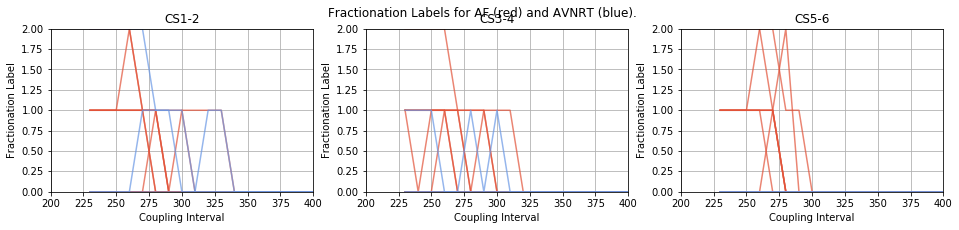

In [7]:
# Comparing fractionation label curves between patient types, after imputation
colours = ['#e25238', '#6997e5']
patient_types = ['af', 'at']
labels = [1,0]

fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(16, 3))
for patient_type, colour in zip(patient_types, colours):
    patients = label_df_imputed[label_df_imputed['Type']==patient_type]['Patient'].unique()
    for patient in patients:
        x = np.arange(230, 410, 10)
        cs12_labels = np.squeeze(label_df_imputed.loc[(label_df_imputed['Type']==patient_type) & (label_df_imputed['Patient']==patient)
                                             & (label_df_imputed['Channel']=='CS1-2')
                                             ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
        x_cs12 = x[~np.isnan(cs12_labels)]
        cs12_labels = cs12_labels[~np.isnan(cs12_labels)]
        
        cs34_labels = np.squeeze(label_df_imputed.loc[(label_df_imputed['Type']==patient_type) & (label_df_imputed['Patient']==patient)
                                             & (label_df_imputed['Channel']=='CS3-4')
                                             ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
        x_cs34 = x[~np.isnan(cs34_labels)]
        cs34_labels = cs34_labels[~np.isnan(cs34_labels)]
        
        cs56_labels = np.squeeze(label_df_imputed.loc[(label_df_imputed['Type']==patient_type) & (label_df_imputed['Patient']==patient)
                                             & (label_df_imputed['Channel']=='CS5-6')
                                             ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
        x_cs56 = x[~np.isnan(cs56_labels)]
        cs56_labels = cs56_labels[~np.isnan(cs56_labels)]
                        
        # Plot conduction delay curves for patient
        
        ax1.plot(x_cs12, cs12_labels, '-', color=colour, alpha=0.7)
        
        ax2.plot(x_cs34, cs34_labels, '-', color=colour, alpha=0.7)

        ax3.plot(x_cs56, cs56_labels, '-', color=colour, alpha=0.7)
        
ax1.set_title('CS1-2')
ax1.set_xlabel('Coupling Interval')
ax1.set_ylabel('Fractionation Label')
ax1.set_ylim(0,2)
ax1.set_xlim(200, 400)
# ax1.legend(['AF', 'AT'])
ax1.grid()
        
ax2.set_title('CS3-4')
ax2.set_xlabel('Coupling Interval')
ax2.set_ylabel('Fractionation Label')
ax2.set_ylim(0,2)
ax2.set_xlim(200,400)
# ax2.legend(['AF', 'AT'])
ax2.grid()
        
ax3.set_title('CS5-6')
ax3.set_xlabel('Coupling Interval')
ax3.set_ylabel('Fractionation Label')
ax3.set_ylim(0,2)
ax3.set_xlim(200,400)
# ax3.legend(['AF', 'AT'])
ax3.grid()
        
plt.suptitle('Fractionation Labels for AF (red) and AVNRT (blue).')

plt.show()

In [7]:
%matplotlib qt

# Comparing average fractionation label curves between patient types.
colours = ['#e25238', '#6997e5']

# Get patients for each patient type
af_patients = average_label_df[average_label_df['Type']=='af']['Patient'].unique()
at_patients = average_label_df[average_label_df['Type']=='at']['Patient'].unique()
avnrt_patients = average_label_df[average_label_df['Type']=='avnrt']['Patient'].unique()
avrt_patients = average_label_df[average_label_df['Type']=='avrt']['Patient'].unique()
ep_patients = average_label_df[average_label_df['Type']=='ep']['Patient'].unique()

x = np.arange(230, 410, 10)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 9))
# First add AF patients
for patient in af_patients:
    cs12_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='af') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS1-2')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs12 = x[~np.isnan(cs12_labels)]
    cs12_labels = cs12_labels[~np.isnan(cs12_labels)]

    cs34_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='af') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS3-4')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs34 = x[~np.isnan(cs34_labels)]
    cs34_labels = cs34_labels[~np.isnan(cs34_labels)]

    cs56_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='af') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS5-6')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs56 = x[~np.isnan(cs56_labels)]
    cs56_labels = cs56_labels[~np.isnan(cs56_labels)]

    # Plot conduction delay curves for AF patient
    for i in range(4):
        axes[i][0].plot(x_cs12, cs12_labels, color=colours[0], alpha=0.7)
        axes[i][1].plot(x_cs34, cs34_labels, color=colours[0], alpha=0.7)
        axes[i][2].plot(x_cs56, cs56_labels, color=colours[0], alpha=0.7)
        
        
# Add AT patients
for patient in at_patients:
    cs12_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='at') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS1-2')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs12 = x[~np.isnan(cs12_labels)]
    cs12_labels = cs12_labels[~np.isnan(cs12_labels)]

    cs34_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='at') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS3-4')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs34 = x[~np.isnan(cs34_labels)]
    cs34_labels = cs34_labels[~np.isnan(cs34_labels)]

    cs56_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='at') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS5-6')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs56 = x[~np.isnan(cs56_labels)]
    cs56_labels = cs56_labels[~np.isnan(cs56_labels)]
    
    axes[0][0].plot(x_cs12, cs12_labels, color=colours[1], alpha=0.7)
    axes[0][1].plot(x_cs34, cs34_labels, color=colours[1], alpha=0.7)
    axes[0][2].plot(x_cs56, cs56_labels, color=colours[1], alpha=0.7)
    
axes[0][1].set_title('AF vs AT', fontsize=8)
    
# Add AVNRT patients
for patient in avnrt_patients:
    cs12_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='avnrt') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS1-2')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs12 = x[~np.isnan(cs12_labels)]
    cs12_labels = cs12_labels[~np.isnan(cs12_labels)]

    cs34_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='avnrt') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS3-4')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs34 = x[~np.isnan(cs34_labels)]
    cs34_labels = cs34_labels[~np.isnan(cs34_labels)]

    cs56_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='avnrt') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS5-6')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs56 = x[~np.isnan(cs56_labels)]
    cs56_labels = cs56_labels[~np.isnan(cs56_labels)]
    
    axes[1][0].plot(x_cs12, cs12_labels, color=colours[1], alpha=0.7)
    axes[1][1].plot(x_cs34, cs34_labels, color=colours[1], alpha=0.7)
    axes[1][2].plot(x_cs56, cs56_labels, color=colours[1], alpha=0.7)
    
axes[1][1].set_title('AF vs AVNRT', fontsize=8)
    
# Add AVRT patients
for patient in avrt_patients:
    cs12_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='avrt') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS1-2')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs12 = x[~np.isnan(cs12_labels)]
    cs12_labels = cs12_labels[~np.isnan(cs12_labels)]

    cs34_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='avrt') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS3-4')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs34 = x[~np.isnan(cs34_labels)]
    cs34_labels = cs34_labels[~np.isnan(cs34_labels)]

    cs56_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='avrt') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS5-6')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs56 = x[~np.isnan(cs56_labels)]
    cs56_labels = cs56_labels[~np.isnan(cs56_labels)]
    
    axes[2][0].plot(x_cs12, cs12_labels, color=colours[1], alpha=0.7)
    axes[2][1].plot(x_cs34, cs34_labels, color=colours[1], alpha=0.7)
    axes[2][2].plot(x_cs56, cs56_labels, color=colours[1], alpha=0.7)
    
axes[2][1].set_title('AF vs AVRT', fontsize=8)
    
# Add EP patients
for patient in ep_patients:
    cs12_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='ep') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS1-2')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs12 = x[~np.isnan(cs12_labels)]
    cs12_labels = cs12_labels[~np.isnan(cs12_labels)]

    cs34_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='ep') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS3-4')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs34 = x[~np.isnan(cs34_labels)]
    cs34_labels = cs34_labels[~np.isnan(cs34_labels)]

    cs56_labels = np.squeeze(average_label_df.loc[(average_label_df['Type']=='ep') & 
                                                  (average_label_df['Patient']==patient) &
                                                  (average_label_df['Channel']=='CS5-6')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs56 = x[~np.isnan(cs56_labels)]
    cs56_labels = cs56_labels[~np.isnan(cs56_labels)]
    
    axes[3][0].plot(x_cs12, cs12_labels, color=colours[1], alpha=0.7)
    axes[3][1].plot(x_cs34, cs34_labels, color=colours[1], alpha=0.7)
    axes[3][2].plot(x_cs56, cs56_labels, color=colours[1], alpha=0.7)
    
axes[3][1].set_title('AF vs EP', fontsize=8)
axes[3][0].set_xlabel('CS1-2', fontsize=8)
axes[3][1].set_xlabel('CS3-4', fontsize=8)
axes[3][2].set_xlabel('CS5-6', fontsize=8)

axes[0][0].set_ylabel('Fractionation Label', fontsize=8)
axes[1][0].set_ylabel('Fractionation Label', fontsize=8)
axes[2][0].set_ylabel('Fractionation Label', fontsize=8)
axes[3][0].set_ylabel('Fractionation Label', fontsize=8)
        
plt.suptitle('Running Average Fractionation Labels.')
plt.subplots_adjust(hspace = 0.3, bottom=0.05, top=0.925)
plt.show()

In [8]:
%matplotlib qt

# Comparing average fractionation label curves between patient types.
colours = ['#e25238', '#6997e5']

# Get patients for each patient type
af_patients = max_label_df[max_label_df['Type']=='af']['Patient'].unique()
at_patients = max_label_df[max_label_df['Type']=='at']['Patient'].unique()
avnrt_patients = max_label_df[max_label_df['Type']=='avnrt']['Patient'].unique()
avrt_patients = max_label_df[max_label_df['Type']=='avrt']['Patient'].unique()
ep_patients = max_label_df[max_label_df['Type']=='ep']['Patient'].unique()

x = np.arange(230, 410, 10)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 9))
# First add AF patients
for patient in af_patients:
    cs12_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='af') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS1-2')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs12 = x[~np.isnan(cs12_labels)]
    cs12_labels = cs12_labels[~np.isnan(cs12_labels)]

    cs34_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='af') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS3-4')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs34 = x[~np.isnan(cs34_labels)]
    cs34_labels = cs34_labels[~np.isnan(cs34_labels)]

    cs56_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='af') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS5-6')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs56 = x[~np.isnan(cs56_labels)]
    cs56_labels = cs56_labels[~np.isnan(cs56_labels)]

    # Plot conduction delay curves for AF patient
    for i in range(4):
        axes[i][0].plot(x_cs12, cs12_labels, color=colours[0], alpha=0.7)
        axes[i][1].plot(x_cs34, cs34_labels, color=colours[0], alpha=0.7)
        axes[i][2].plot(x_cs56, cs56_labels, color=colours[0], alpha=0.7)
        
        
# Add AT patients
for patient in at_patients:
    cs12_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='at') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS1-2')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs12 = x[~np.isnan(cs12_labels)]
    cs12_labels = cs12_labels[~np.isnan(cs12_labels)]

    cs34_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='at') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS3-4')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs34 = x[~np.isnan(cs34_labels)]
    cs34_labels = cs34_labels[~np.isnan(cs34_labels)]

    cs56_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='at') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS5-6')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs56 = x[~np.isnan(cs56_labels)]
    cs56_labels = cs56_labels[~np.isnan(cs56_labels)]
    
    axes[0][0].plot(x_cs12, cs12_labels, color=colours[1], alpha=0.7)
    axes[0][1].plot(x_cs34, cs34_labels, color=colours[1], alpha=0.7)
    axes[0][2].plot(x_cs56, cs56_labels, color=colours[1], alpha=0.7)
    
axes[0][1].set_title('AF vs AT', fontsize=8)
    
# Add AVNRT patients
for patient in avnrt_patients:
    cs12_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='avnrt') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS1-2')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs12 = x[~np.isnan(cs12_labels)]
    cs12_labels = cs12_labels[~np.isnan(cs12_labels)]

    cs34_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='avnrt') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS3-4')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs34 = x[~np.isnan(cs34_labels)]
    cs34_labels = cs34_labels[~np.isnan(cs34_labels)]

    cs56_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='avnrt') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS5-6')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs56 = x[~np.isnan(cs56_labels)]
    cs56_labels = cs56_labels[~np.isnan(cs56_labels)]
    
    axes[1][0].plot(x_cs12, cs12_labels, color=colours[1], alpha=0.7)
    axes[1][1].plot(x_cs34, cs34_labels, color=colours[1], alpha=0.7)
    axes[1][2].plot(x_cs56, cs56_labels, color=colours[1], alpha=0.7)
    
axes[1][1].set_title('AF vs AVNRT', fontsize=8)
    
# Add AVRT patients
for patient in avrt_patients:
    cs12_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='avrt') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS1-2')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs12 = x[~np.isnan(cs12_labels)]
    cs12_labels = cs12_labels[~np.isnan(cs12_labels)]

    cs34_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='avrt') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS3-4')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs34 = x[~np.isnan(cs34_labels)]
    cs34_labels = cs34_labels[~np.isnan(cs34_labels)]

    cs56_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='avrt') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS5-6')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs56 = x[~np.isnan(cs56_labels)]
    cs56_labels = cs56_labels[~np.isnan(cs56_labels)]
    
    axes[2][0].plot(x_cs12, cs12_labels, color=colours[1], alpha=0.7)
    axes[2][1].plot(x_cs34, cs34_labels, color=colours[1], alpha=0.7)
    axes[2][2].plot(x_cs56, cs56_labels, color=colours[1], alpha=0.7)
    
axes[2][1].set_title('AF vs AVRT', fontsize=8)
    
# Add EP patients
for patient in ep_patients:
    cs12_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='ep') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS1-2')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs12 = x[~np.isnan(cs12_labels)]
    cs12_labels = cs12_labels[~np.isnan(cs12_labels)]

    cs34_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='ep') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS3-4')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs34 = x[~np.isnan(cs34_labels)]
    cs34_labels = cs34_labels[~np.isnan(cs34_labels)]

    cs56_labels = np.squeeze(max_label_df.loc[(max_label_df['Type']=='ep') & 
                                                  (max_label_df['Patient']==patient) &
                                                  (max_label_df['Channel']=='CS5-6')
                                                 ].drop(['Channel', 'Patient', 'Type'], axis=1).values)
    x_cs56 = x[~np.isnan(cs56_labels)]
    cs56_labels = cs56_labels[~np.isnan(cs56_labels)]
    
    axes[3][0].plot(x_cs12, cs12_labels, color=colours[1], alpha=0.7)
    axes[3][1].plot(x_cs34, cs34_labels, color=colours[1], alpha=0.7)
    axes[3][2].plot(x_cs56, cs56_labels, color=colours[1], alpha=0.7)
    
axes[3][1].set_title('AF vs EP', fontsize=8)
axes[3][0].set_xlabel('CS1-2', fontsize=8)
axes[3][1].set_xlabel('CS3-4', fontsize=8)
axes[3][2].set_xlabel('CS5-6', fontsize=8)

axes[0][0].set_ylabel('Fractionation Label', fontsize=8)
axes[1][0].set_ylabel('Fractionation Label', fontsize=8)
axes[2][0].set_ylabel('Fractionation Label', fontsize=8)
axes[3][0].set_ylabel('Fractionation Label', fontsize=8)
        
plt.suptitle('Max Fractionation Labels.')
plt.subplots_adjust(hspace = 0.3, bottom=0.05, top=0.925)
plt.show()

In [ ]:
# Can we use the average fractionation label to predict the risk of AF?
average_label_list = []

for _, row in label_df.iterrows():
        temp_dict = {}
    temp_dict['Channel'] = row['Channel']
    temp_dict['Patient'] = row['Patient']
    temp_dict['Type'] = row['Type']

    labels = row.drop(['Channel', 'Patient', 'Type']).tolist()